In [1]:


suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

source("figure_themes.R")

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [2]:
output_file <- file.path(
    "..","..","figures","Binary_Classification","DMSO_0.025_vs_LPS_100","SHSY5Y","pr_curves.png"
)

In [3]:
results_dir <- file.path(
    "..","..","results","Binary_Classification","DMSO_0.025_vs_LPS_100","SHSY5Y"
)
results_file <- file.path(
    results_dir,"training_metrics.csv"
)

# Read in the results file
df <- read.csv(results_file)
head(df,3)

,treatments_tested,model,group,shuffled_data,PR_Threshold,Precision,Recall
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,DMSO_0.100_DMSO_0.025 vs. LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,train,False,0.000000e+00,0.2780008,1
2,DMSO_0.100_DMSO_0.025 vs. LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,train,False,2.955735e-39,0.2919333,1
3,DMSO_0.100_DMSO_0.025 vs. LPS_100.000_DMSO_0.025,DMSO_0.025_vs_LPS_100,train,False,2.981007e-39,0.2919423,1


In [4]:
unique(df$group)

[1] "train"      "validation" "test"       "holdout"

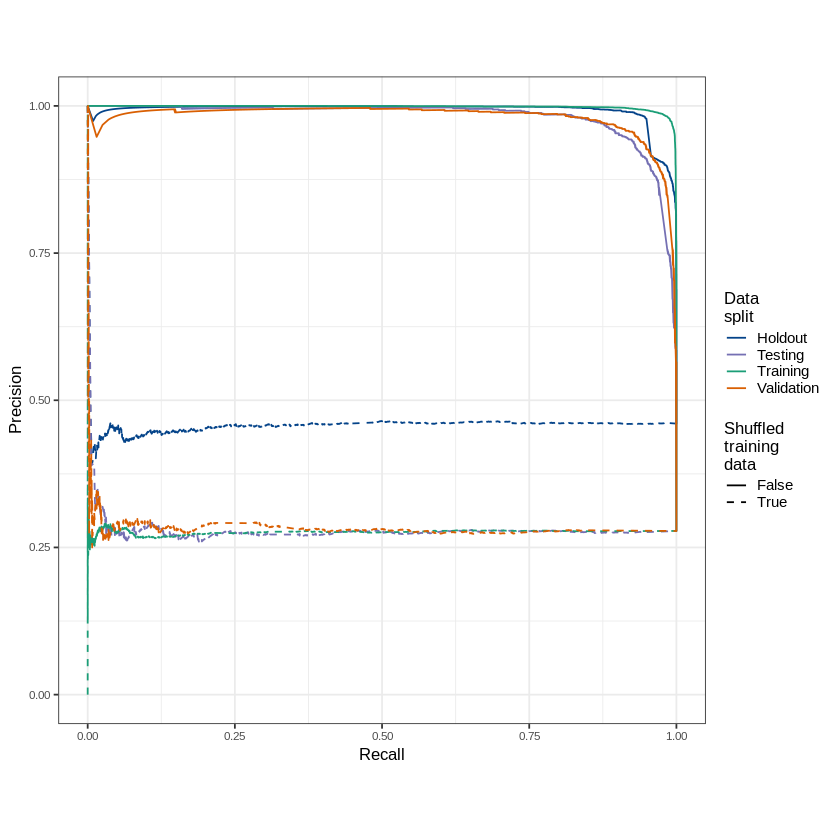

In [5]:


pr_curve_gg <- (
    ggplot(df, aes(x = Recall, y = Precision))
    + geom_line(aes(color = group, linetype = shuffled_data))
    + theme_bw()
    + xlab("Recall")
    + ylab("Precision")
    # + scale_color_manual(
    #     name = "Data\nsplit",
    #     labels = feature_type_with_data_split_labels,
    #     values = feature_type_with_data_split_colors
    # )

    # set the colors of the lines
    + scale_color_manual(
        name = "Data\nsplit",
        labels = data_split_labels,
        values = data_split_colors
    )

    + scale_linetype_manual(
        name = "Shuffled\ntraining\ndata",
        labels = shuffled_labels,
        values = shuffled_linetypes
    )

    + guides(
        color = guide_legend(order = 1),
        linetype = guide_legend(order = 2),
    )
    + coord_fixed()
    + figure_theme
    # Decrease spacing in legend
    + theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.2, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines")
    )
)

# ggsave(output_file, pr_curve_gg, height = 5.5, width = 8.5, dpi = 500)

pr_curve_gg
     
